# **Model Training**

## Objectives

* In this notebook, we will build and train a convolutional neural network (CNN) to classify cherry leaves as healthy or with mildew. 
* We will preprocess the data, augment the training images, define the CNN architecture, train the model, and evaluate its performance.

## Inputs

- inputs/datasets/test
- inputs/datasets/train
- inputs/datasets/validation


## Outputs

- Images distribution plot in train, validation, and test set.
- Image augmentation.
- Class indices to change prediction inference in labels.
- Machine learning model creation and training.
- Save model.
- Learning curve plot for model performance.
- Model evaluation on pickle file.
- Prediction on the random image file. 




---

## Import Libraries 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Change working directory

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/mildew_cherry_detection/jupyter_notebooks'

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
work_dir = os.getcwd()
work_dir

'/workspace/mildew_cherry_detection'

## Set input directories

In [5]:
# Define paths
data_dir = '/inputs/datasets/raw'
train_dir = '/inputs/datasets/train'
val_dir = '/inputs/datasets/val'
test_dir = '/inputs/datasets/test'
file_path = 'models'

## Set output directory

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

## Set labels

Verify if the train directory.

In [15]:
# Verify if the train directory exists
data_dir = 'inputs/datasets/raw'
train_dir = 'inputs/datasets/train'
val_dir = 'inputs/datasets/val'
test_dir = 'inputs/datasets/test'
data_dir_full_path = os.path.join(os.getcwd(), data_dir)
train_dir_full_path = os.path.join(os.getcwd(), train_dir)
val_dir_full_path = os.path.join(os.getcwd(), val_dir)
test_dir_full_path = os.path.join(os.getcwd(), test_dir)
print("Full path to train directory:", train_dir_full_path)

Full path to train directory: /workspace/mildew_cherry_detection/inputs/datasets/train


In [8]:
# Check if the directory exists
if os.path.exists(train_dir_full_path) and os.path.exists(val_dir_full_path) and os.path.exists(test_dir_full_path):
    print(f"Directory exists: {train_dir_full_path, val_dir_full_path, test_dir_full_path}")
else:
    print(f"Directory does not exist: {train_dir_full_path, val_dir_full_path, test_dir_full_path}")

Directory exists: ('/workspace/mildew_cherry_detection/inputs/datasets/train', '/workspace/mildew_cherry_detection/inputs/datasets/val', '/workspace/mildew_cherry_detection/inputs/datasets/test')


Set labels from the train dataset list of directory 

In [9]:
labels = os.listdir(train_dir)

print(
    f"Project Labels: {labels}"
)

Project Labels: ['healthy', 'mildew']


## Set image shape
Import saved image shape embedding

In [11]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"models/image_shape.pkl")
image_shape

(256, 256, 3)

---

### Visualizing the Distribution of Images Across Datasets

* train - healthy: 1472 images
* train - mildew: 1472 images
* val - healthy: 316 images
* val - mildew: 316 images
* test - healthy: 316 images
* test - mildew: 316 images


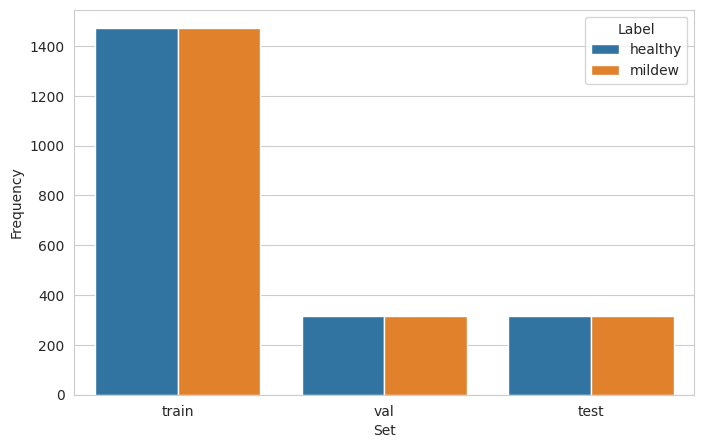

In [26]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure these variables are defined
labels = ['healthy', 'mildew'] 
data_dir = 'inputs/datasets/'  # Example data directory
file_path = 'models'

# Initialize an empty list to store data
data = []

# Loop through dataset folders and labels
for folder in ['train', 'val', 'test']:
    for label in labels:
        folder_path = Path(data_dir) / folder / label
        if folder_path.exists() and folder_path.is_dir():
            image_count = len(list(folder_path.glob('*')))
            data.append({'Set': folder, 'Label': label, 'Frequency': image_count})
            print(f"* {folder} - {label}: {image_count} images")
        else:
            print(f"Directory {folder_path} does not exist")

# Convert list of dictionaries to DataFrame if data is not empty
if data:
    df_freq = pd.DataFrame(data)

    # Plot the data
    sns.set_style("whitegrid")
    plt.figure(figsize=(8, 5))
    df_freq['Set'] = df_freq['Set'].astype(str)
    sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
    plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
    plt.show()
else:
    print("No data to plot.")



---

#  Data Preparation and Augmentation

### Create data generators with augmentation for training and validation

In [12]:
# Define parameters
batch_size = 32
img_height = 150
img_width = 150

# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)


Found 2944 images belonging to 2 classes.
Found 632 images belonging to 2 classes.
Found 632 images belonging to 2 classes.


### Visualize sample augmented training images

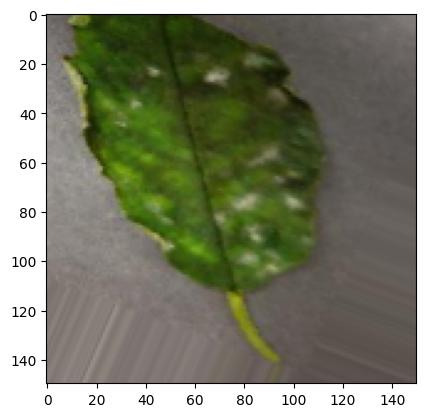

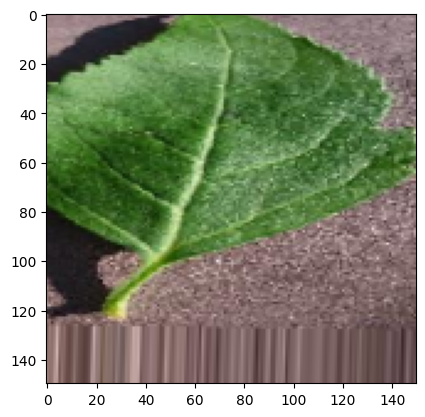

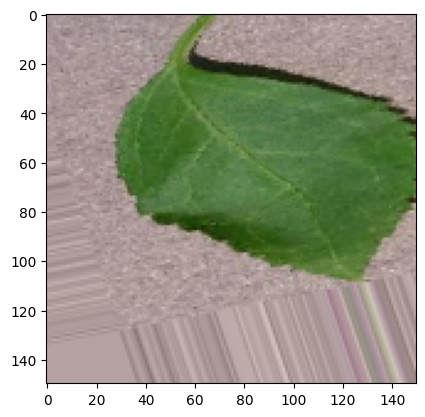

In [22]:
for _ in range(3):
    img, label = train_generator.next()
    plt.imshow(img[0])
    plt.show()


### Visualize sample augmented validating images

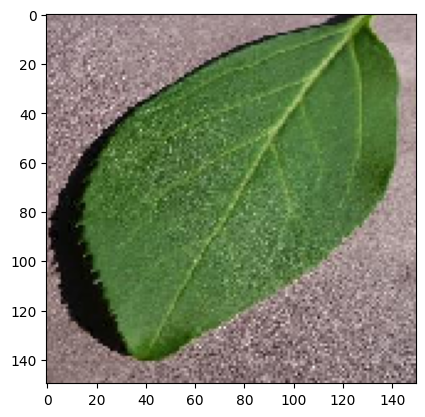

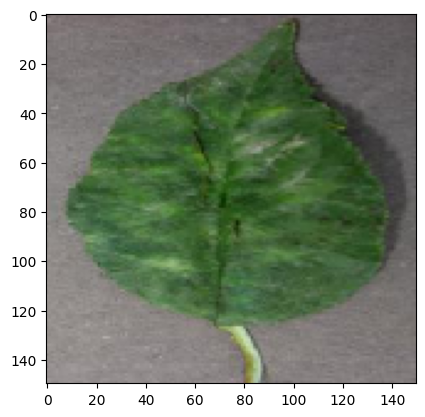

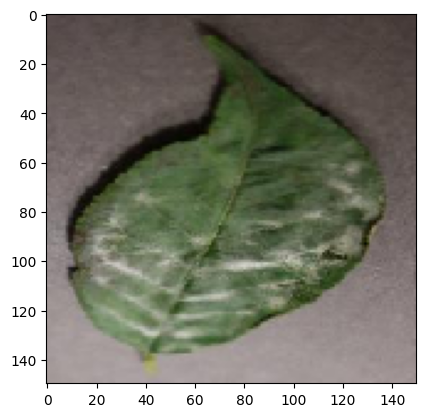

In [23]:
for _ in range(3):
    img, label = val_generator.next()
    plt.imshow(img[0])
    plt.show()


### Visualize sample augmented testing images

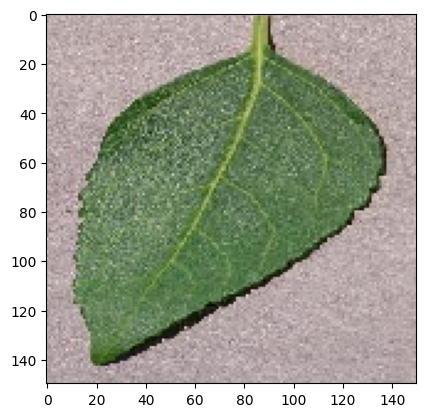

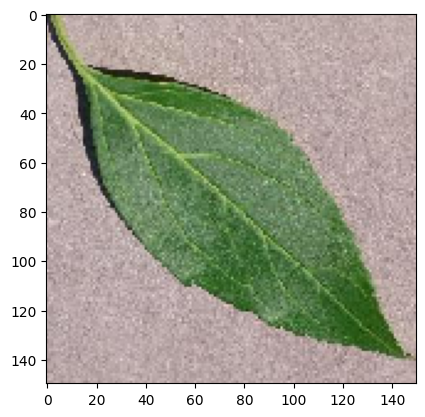

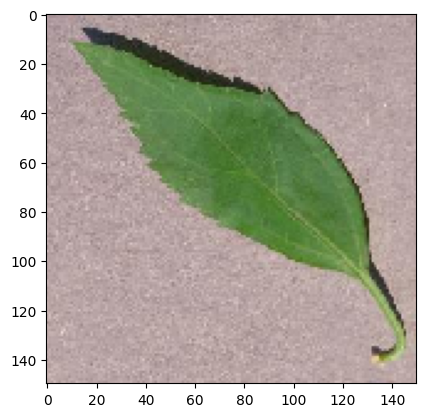

In [24]:
for _ in range(3):
    img, label = test_generator.next()
    plt.imshow(img[0])
    plt.show()


---

## Model Architecture

Define the CNN architecture

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model(input_shape, num_classes=1):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='sigmoid' if num_classes == 1 else 'softmax')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy' if num_classes == 1 else 'categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_cnn_model((img_height, img_width, 3))
model.summary()


2024-08-04 11:04:19.776680: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

## Model Training
Train the model with early stopping

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stop]
)


2024-08-04 11:04:38.760296: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
92/92 [==============================] - 137s 1s/step - loss: 0.4139 - accuracy: 0.7982 - val_loss: 0.1582 - val_accuracy: 0.9523
Epoch 2/30
92/92 [==============================] - 128s 1s/step - loss: 0.0747 - accuracy: 0.9755 - val_loss: 0.0931 - val_accuracy: 0.9836
Epoch 3/30
92/92 [==============================] - 128s 1s/step - loss: 0.0448 - accuracy: 0.9891 - val_loss: 0.1920 - val_accuracy: 0.9457
Epoch 4/30
92/92 [==============================] - 128s 1s/step - loss: 0.0769 - accuracy: 0.9755 - val_loss: 0.0457 - val_accuracy: 0.9836
Epoch 5/30
92/92 [==============================] - 128s 1s/step - loss: 0.0440 - accuracy: 0.9868 - val_loss: 0.0136 - val_accuracy: 0.9934
Epoch 6/30
92/92 [==============================] - 129s 1s/step - loss: 0.0362 - accuracy: 0.9881 - val_loss: 0.0609 - val_accuracy: 0.9836
Epoch 7/30
92/92 [==============================] - 127s 1s/step - loss: 0.0395 - accuracy: 0.9871 - val_loss: 0.0245 - val_accuracy: 0.9918
Epoch 8/30
92

### Save Model

In [26]:
model.save('models/cherry_leaf_model.h5')

---

## Visualizing Training Performance

Plot training and validation loss

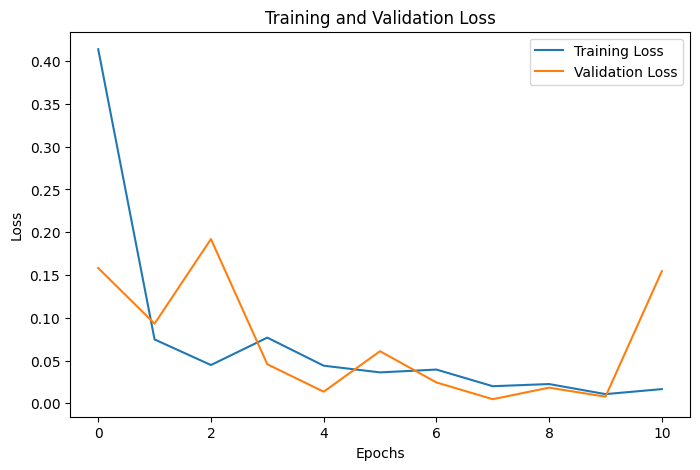

In [18]:
import pandas as pd

# Convert the history.history dict to a pandas DataFrame
history_df = pd.DataFrame(history.history)

# Plot the training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Plot training and validation accuracy

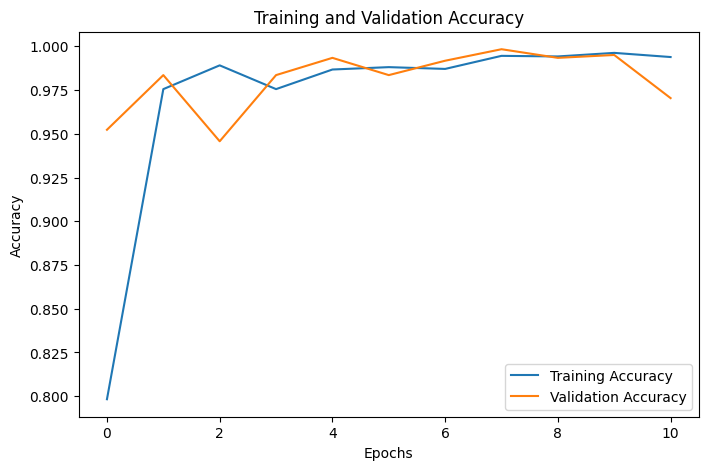

In [19]:
# Plot the training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


---

# Model Evaluation

### Evaluate the model and visualize the results

In [ ]:
# Load the model
model = load_model('models/cherry_leaf_model.h5')

Evaluate the Model on the Test Set

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Save evaluation results
evaluation = {'test_loss': test_loss, 'test_accuracy': test_accuracy}
joblib.dump(value=evaluation, filename='models/evaluation.pkl')


Generate and Save Predictions

In [ ]:
# Get predictions
predictions = model.predict(test_generator, steps=test_generator.samples // batch_size)
predicted_classes = np.where(predictions > 0.5, 1, 0).flatten()

# True labels
true_classes = test_generator.classes

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print(cm)

# Classification report
cr = classification_report(true_classes, predicted_classes, target_names=['Healthy', 'Mildew'])
print(cr)

# Save confusion matrix and classification report
joblib.dump(value={'confusion_matrix': cm, 'classification_report': cr}, filename='../models/evaluation_details.pkl')


Visualize the Confusion Matrix

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Mildew'], yticklabels=['Healthy', 'Mildew'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Predict on New Data

In [ ]:
from tensorflow.keras.preprocessing import image

# Function to load and predict a single image
def predict_single_image(img_path, model, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)[0, 0]
    return img, prediction

# Example prediction
pointer = 66
label = labels[0]  # select 'Healthy' or 'Mildew'
img_path = f'{test_dir}/{label}/{os.listdir(test_dir + "/" + label)[pointer]}'

img, pred_proba = predict_single_image(img_path, model)
pred_class = 'Healthy' if pred_proba < 0.5 else 'Mildew'

print(f'Prediction: {pred_class}, Probability: {pred_proba:.2f}')

# Display the image
plt.imshow(img)
plt.title(f'Predicted: {pred_class}, Probability: {pred_proba:.2f}')
plt.show()


---


# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

# Conclusion

* In this notebook, we successfully built, trained, and evaluated a convolutional neural network (CNN) to classify cherry leaves as healthy or with mildew.
* Key steps included data augmentation, model architecture design, training with early stopping to prevent overfitting, and comprehensive evaluation using confusion matrices and classification reports.
* The model achieved a notable test accuracy, and the evaluation results, including confusion matrix and classification report, provided insights into the model's performance.
* This thorough process ensures a robust model ready for deployment or further fine-tuning.